In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/iAM_Pb448.json', 'r') as file:
    models = json.loads(file.read())

## Data Inspection

In [4]:
type(models)

dict

In [5]:
len(models)

6

In [6]:
models.keys()

dict_keys(['metabolites', 'reactions', 'genes', 'id', 'compartments', 'version'])

In [7]:
models['id']

'iAM_Pb448'

In [8]:
models['version']

'1'

In [9]:
models['compartments']

{'c': 'cytosol',
 'e': 'extracellular space',
 'g': 'golgi apparatus',
 'h': 'chloroplast',
 'l': 'lysosome',
 'm': 'mitochondria',
 'r': 'endoplasmic reticulum'}

In [10]:
models['reactions'][:2]

[{'id': 'EX_h2o_e',
  'name': 'H2O exchange',
  'metabolites': {'h2o_e': -1.0},
  'lower_bound': -1.0,
  'upper_bound': 1000000.0,
  'gene_reaction_rule': '',
  'subsystem': 'Extracellular exchange',
  'notes': {'original_bigg_ids': ['EX_h2o_LPAREN_e_RPAREN_']},
  'annotation': {'bigg.reaction': ['EX_h2o_e'],
   'biocyc': ['META:TRANS-RXN-145', 'META:TRANS-RXN0-547'],
   'metanetx.reaction': ['MNXR98641'],
   'reactome.reaction': ['R-ATH-507868',
    'R-CFA-432054',
    'R-CFA-432010',
    'R-RNO-507868',
    'R-OSA-432065',
    'R-GGA-432010',
    'R-SPO-445714',
    'R-PFA-445714',
    'R-CFA-432065',
    'R-GGA-432067',
    'R-TGU-432054',
    'R-TGU-445714',
    'R-OSA-507868',
    'R-DRE-507868',
    'R-SPO-507868',
    'R-BTA-432054',
    'R-GGA-507870',
    'R-OSA-432010',
    'R-DME-432065',
    'R-DRE-432067',
    'R-PFA-507868',
    'R-SSC-432054',
    'R-HSA-432065',
    'R-OSA-507870',
    'R-HSA-432054',
    'R-SSC-432065',
    'R-CEL-507868',
    'R-XTR-507868',
    'R-AT

In [11]:
models['metabolites'][:2]

[{'id': 'cdpdag_pf_18_1_20_4_c',
  'name': 'CDP diacylglycerol(plasmodium,C18:1,C20:4)',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C50H81N3O15P2',
  'notes': {'original_bigg_ids': ['cdpdag_pf_18_1_20_4_c']},
  'annotation': {'bigg.metabolite': ['cdpdag_pf_18_1_20_4'],
   'sbo': 'SBO:0000247'}},
 {'id': 'pa_pf_18_1_20_4_c',
  'name': 'Phosphatidic acid(plasmodium,C18:1,C20:4)',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C41H69O8P',
  'notes': {'original_bigg_ids': ['pa_pf_18_1_20_4_c']},
  'annotation': {'bigg.metabolite': ['pa_pf_18_1_20_4'],
   'sbo': 'SBO:0000247'}}]

## 'gene reaction rule' in 'reactions'

In [12]:
for i, reaction in enumerate(models['reactions']):
    if i < 60:
        print(reaction['gene_reaction_rule'])
    else:
        break
        


((PBANKA_132360 or PBANKA_051100) or PBANKA_133280) and (PBANKA_051100 or PBANKA_132360)
PBANKA_051980

PBANKA_091820
PBANKA_081210 or PBANKA_112360
PBANKA_030820
PBANKA_135520
PBANKA_135520
PBANKA_135520
PBANKA_135520
PBANKA_101440
PBANKA_052160
PBANKA_112650
PBANKA_093610

PBANKA_051360
PBANKA_132210
PBANKA_082330
PBANKA_136010
PBANKA_120720 or PBANKA_020280 or PBANKA_040430 or PBANKA_071390
PBANKA_071760
PBANKA_051690
PBANKA_103750 or PBANKA_122760
PBANKA_136010


PBANKA_030430
PBANKA_030430
PBANKA_113110
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820



PBANKA_123560
PBANKA_070670 or PBANKA_143870
(PBANKA_071010 or PBANKA_141110) and PBANKA_141910 and (PBANKA_071490 or PBANKA_144690)
PBANKA_070670
PBANKA_070670

PBANKA_070670
PBANKA_144100


PBANKA_145920
PBANKA_060690 or PBANKA_144610 or PBANKA_030670 or PBANKA_111510 or PBANKA_091590 or PBANKA_1128300
PBANKA_114050
PBANKA_130440


PBANKA_145500



From above, we see that some reactions are ruled by some genes, and some reactions are not ruled by any gene.

## look at a spefic reaction and compare data to its web infomation

In [13]:
# http://bigg.ucsd.edu/models/iND750/reactions/13BGH
for reaction in models['reactions']:
    if reaction['id'] == '13BGH':
        print(reaction)

The useful attribute here is *'metabolites'*, 

In [14]:
for gene in models['genes']:
    if gene['id'] == 'YGR282C':
        print(gene)

## Data Preparation

In [15]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [16]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    if m['id'] == metabolite:
                        # exclude inorganic metabolites
                        try:
                            if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                                if v > 0 and metabolite not in genes[gene['id']]['products']:
                                    genes[gene['id']]['products'].append(metabolite)
                                if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                    genes[gene['id']]['substrates'].append(metabolite)
                            elif metabolite not in inorganics:
                                inorganics.append(metabolite)
                            else:
                                break
                        except KeyError:
                            print(m)
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [17]:
inorganics

['h2o_c',
 'h_c',
 'nh4_c',
 'h2o_h',
 'h_h',
 'nh4_h',
 'co2_m',
 'nh4_m',
 'h_e',
 'pi_c',
 'pi_h',
 'ppi_c',
 'co2_c',
 'co2_h',
 'h_r',
 'grxox_c',
 'grxrd_c',
 'h2o2_c',
 'plrxox_c',
 'plrxrd_c',
 'trdox_c',
 'trdrd_c',
 'h2o2_m',
 'h2o_m',
 'trdox_m',
 'trdrd_m',
 'h_m',
 'h2o2_h',
 'seln_c',
 'selnp_c',
 'pppi_c',
 'o2_c',
 'o2s_c',
 'h2o_l',
 'o2_m',
 'o2s_m',
 'apoACP_h',
 'pi_m',
 'ppi_m',
 'dsbcox_r',
 'dsbcrd_r',
 'dsbgox_r',
 'dsbgrd_r',
 'k_c',
 'k_e',
 '2fe2s_h',
 '4fe4s_h',
 'fe2_h',
 'h2o_g',
 'h_g',
 'aopox_h',
 'aoprd_h',
 'plrxox_h',
 'plrxrd_h',
 'grxox_h',
 'grxrd_h',
 'ppi_h',
 'mg2_c',
 'mg2_e',
 'fdox_h',
 'fdred_h',
 'na1_c',
 'na1_e',
 'no2_m',
 'h_l',
 'ni2_c',
 'ni2_e',
 'pi_e',
 'no3_m',
 'h2o_e',
 'nh4_e',
 'fe2_m',
 'fe2_c',
 'fe2_e',
 'no2_c',
 'no2_e',
 'no3_c',
 'no3_e']

In [18]:
df = pd.DataFrame.from_dict(genes).T
df

,reactions,substrates,products,links
PBANKA_122820,[GLUDxi],"[glu__L_c, nad_c]","[akg_c, nadh_c]","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_102620,"[GLUDy, GDH_nadp]","[glu__L_c, nadp_c, glu__L_h, nadp_h]","[akg_c, nadph_c, akg_h, nadph_h]","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_101400,"[GLUDy, GDH_nadp]","[glu__L_c, nadp_c, glu__L_h, nadp_h]","[akg_c, nadph_c, akg_h, nadph_h]","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_100950,"[GLUSx, GLUSy]","[akg_c, gln__L_c, nadh_c, nadph_c]","[glu__L_c, nad_c, nadp_c]","[PBANKA_122820, PBANKA_102620, PBANKA_101400, ..."
PBANKA_136430,"[GLYK, GNK, GLYCK2]","[atp_c, glyc_c, glcn_c, glyc__R_c]","[adp_c, glyc3p_c, 6pgc_c, 2pg_c]","[PBANKA_142130, PBANKA_040470, PBANKA_040220, ..."
...,...,...,...,...
PBANKA_030080,"[PPTT, GGTT, OPP, HEXTT]","[ipdp_c, pendp_c, ggdp_c, hepdp_c, hexdp_c]","[hexdp_c, pendp_c, octdp_c, hepdp_c]",[]
PBANKA_145020,"[GHMT2r, GHMT2rc, GHMT2rm]","[ser__L_c, thf_c, ser__L_h, thf_h, ser__L_m, t...","[gly_c, mlthf_c, gly_h, mlthf_h, gly_m, mlthf_m]","[PBANKA_111180, PBANKA_136010, PBANKA_020990, ..."
PBANKA_131980,"[GHMT2r, GHMT2rc, GHMT2rm]","[ser__L_c, thf_c, ser__L_h, thf_h, ser__L_m, t...","[gly_c, mlthf_c, gly_h, mlthf_h, gly_m, mlthf_m]","[PBANKA_111180, PBANKA_136010, PBANKA_020990, ..."
PBANKA_082350,[GLNS],"[atp_c, glu__L_c]","[adp_c, gln__L_c]","[PBANKA_142130, PBANKA_040470, PBANKA_040220, ..."


In [19]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

,index,links
0,PBANKA_122820,PBANKA_100950
1,PBANKA_122820,PBANKA_030230
2,PBANKA_122820,PBANKA_132210
3,PBANKA_122820,PBANKA_070670
4,PBANKA_122820,PBANKA_143870
...,...,...
7386,PBANKA_081980,PBANKA_112560
7387,PBANKA_081980,PBANKA_061160
7388,PBANKA_081980,PBANKA_121420
7389,PBANKA_081980,PBANKA_103660


In [21]:
# show genes having no links
print(df.loc[df['links'].str.len() == 0])

                                        reactions  \
PBANKA_135470              [GPIMT11er, GPIMT12er]   
PBANKA_142270                             [SPODM]   
PBANKA_112240                            [SPODMm]   
PBANKA_135700                             [THFAT]   
PBANKA_010610                           [HBZOPTm]   
PBANKA_070420                           [UDPDPS3]   
PBANKA_010590                [UPPDC1_1, UPPDC2_1]   
PBANKA_131060                               [HMZ]   
PBANKA_092090                [DSBCGT_1, DSBGGT_1]   
PBANKA_092430                [DSBCGT_1, DSBGGT_1]   
PBANKA_133580                [DSBCGT_1, DSBGGT_1]   
PBANKA_132890                               [Kt1]   
PBANKA_082030                [DSBCGT_1, DSBGGT_1]   
PBANKA_070280                [DSBCGT_1, DSBGGT_1]   
PBANKA_136520                [DSBCGT_1, DSBGGT_1]   
PBANKA_144100                              [AKP1]   
PBANKA_091430                [DSBCGT_1, DSBGGT_1]   
PBANKA_113080                           [MI145

In [22]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [23]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [24]:
giant = max(connected_component_subgraphs(G), key=len)

In [25]:
giant.number_of_nodes()

410

## Laplacian and Eigen

In [26]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes())).astype(np.int64)
L.todense()

matrix([[ 7,  0,  0, ...,  0,  0,  0],
        [ 0,  2,  0, ...,  0,  0,  0],
        [ 0,  0,  3, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 29,  0,  0],
        [ 0,  0,  0, ...,  0,  6,  0],
        [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

In [27]:
eig = np.linalg.eig(L.todense())

## Plotting

In [28]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)

In [29]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [30]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [31]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot 1st, 2nd, 3rd smallest, and largest coefficient

C:\Users\zhouy\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


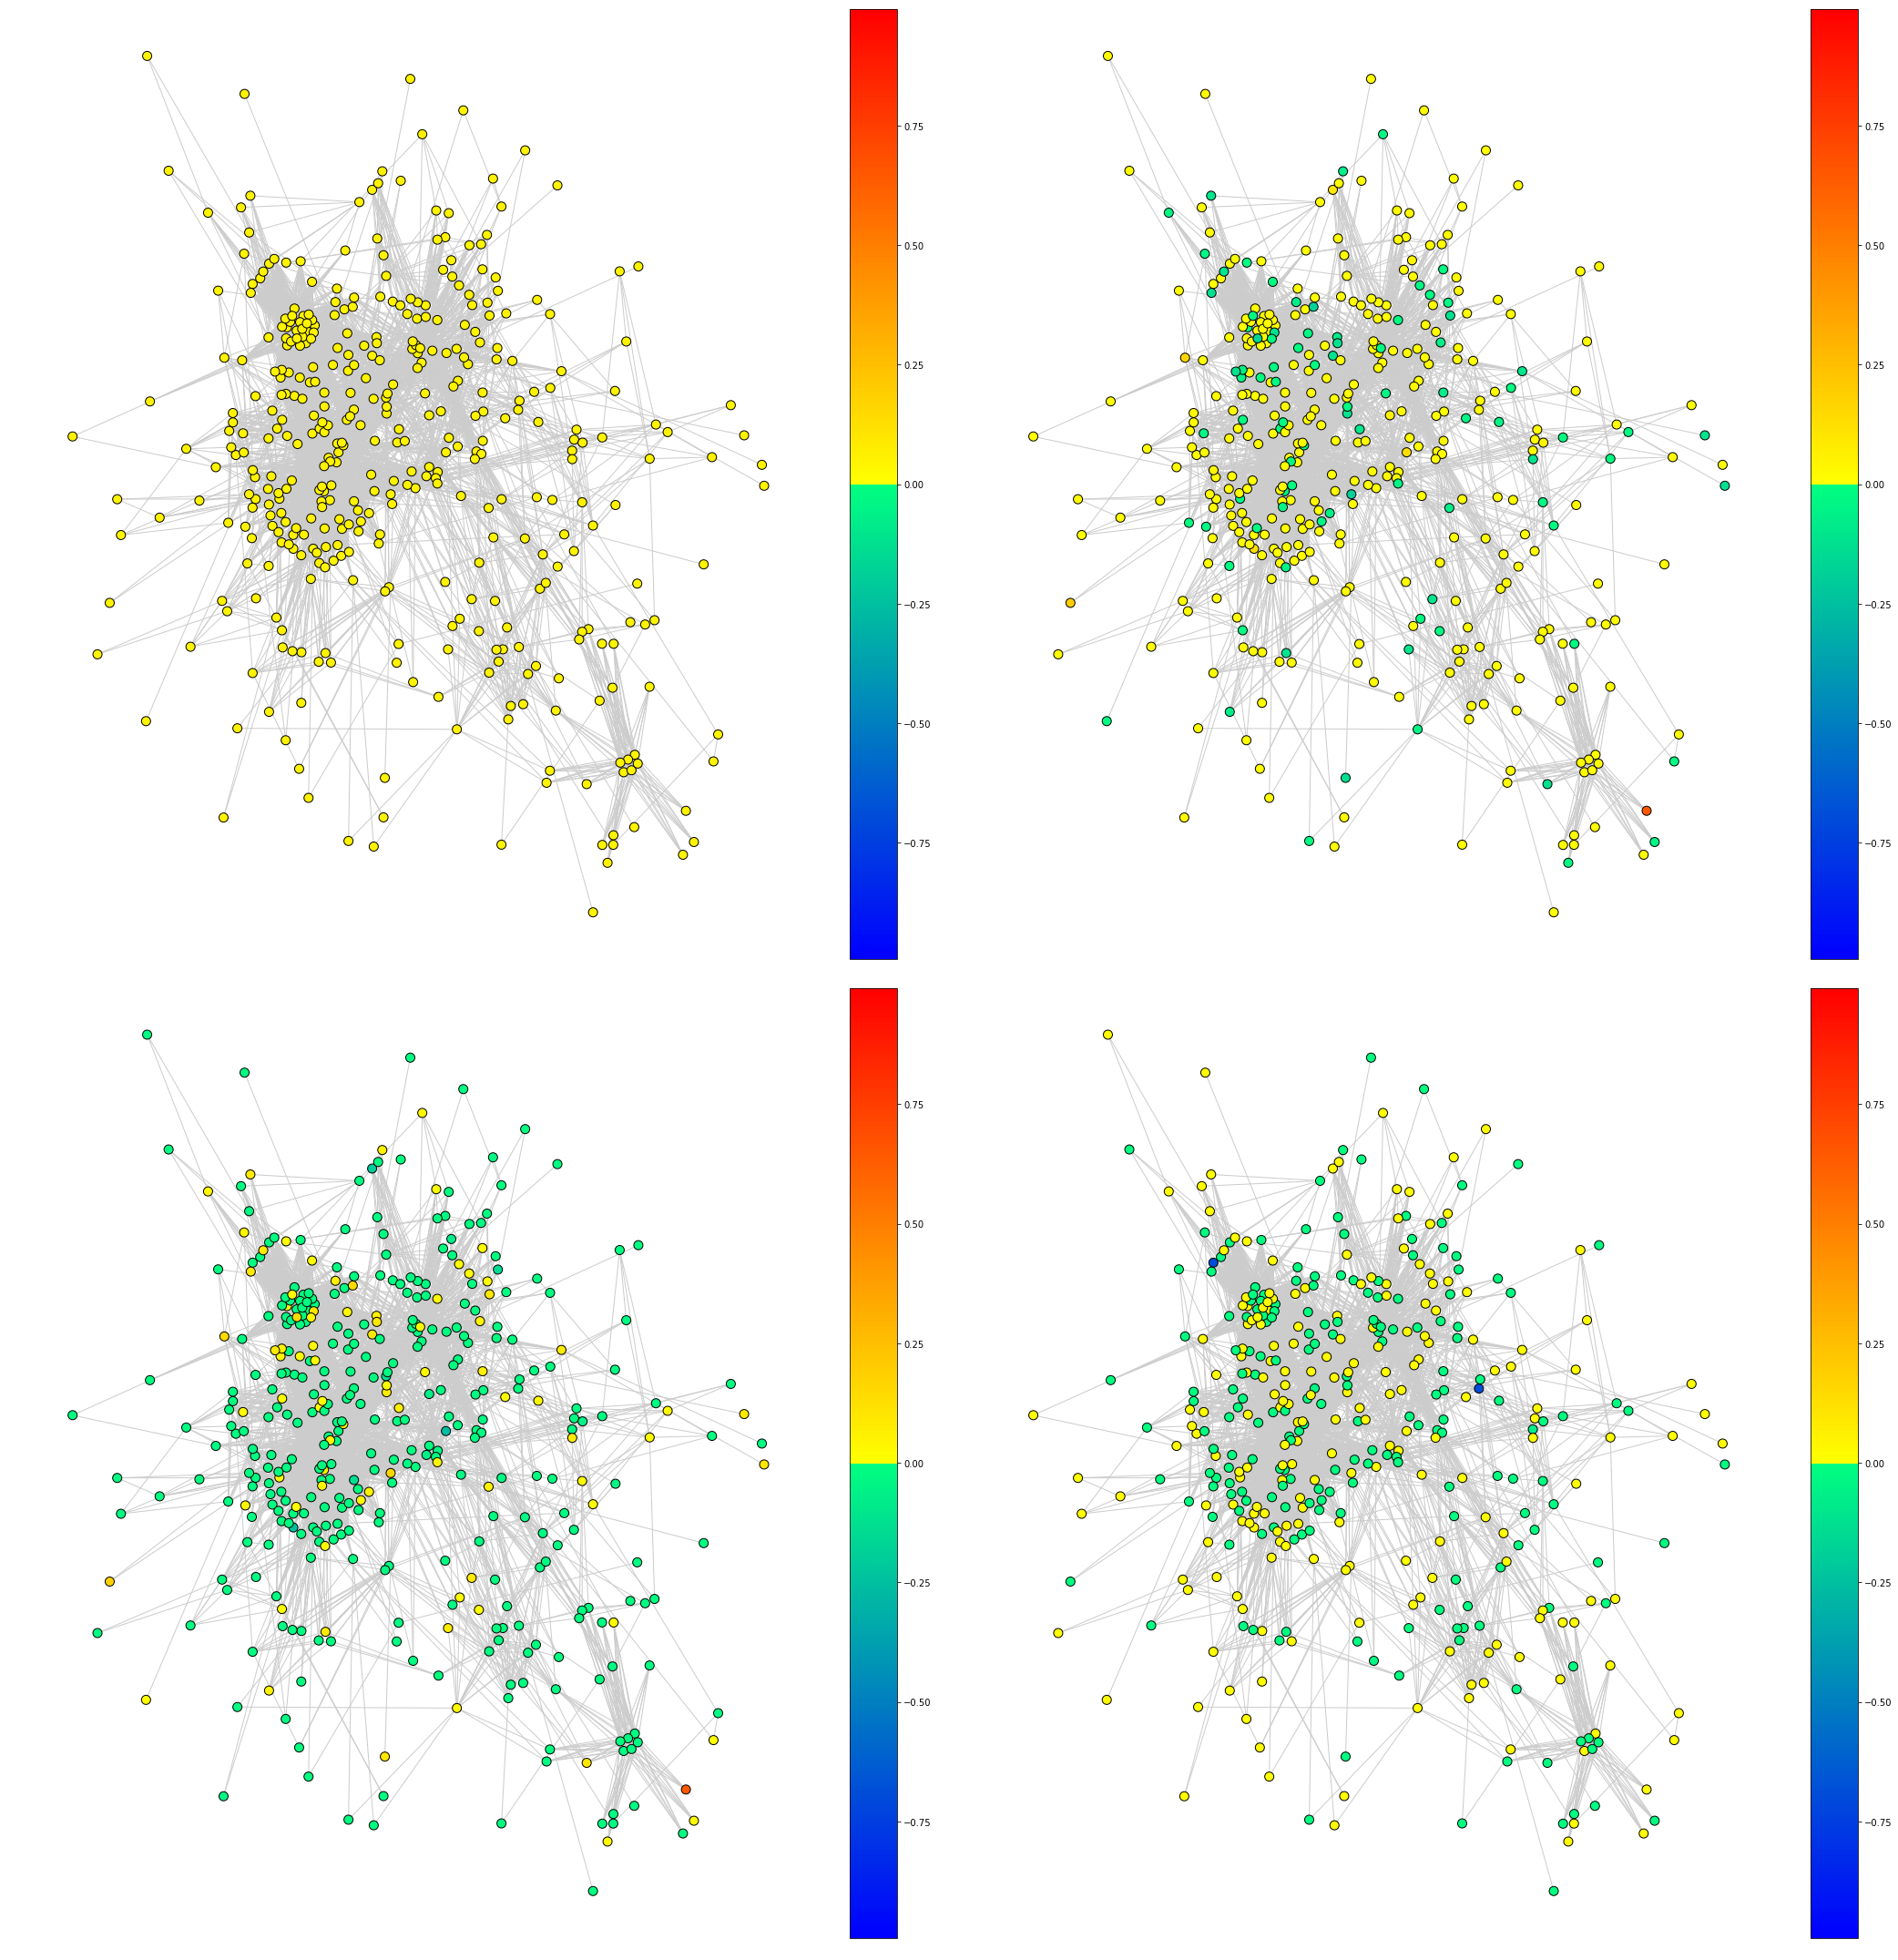

In [32]:
k_lst = [0, 1, 2, len(eig[0])-1]
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(2,2,i+1)
    draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()